In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)
import tensorflow 
tensorflow.keras.__version__
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame from the files' path

blackJack = pd.read_csv('C://Users//csuch//OneDrive//Desktop//Challenges//BlackJack_project//cs_blackjack project//BlackJack_Machine_learning//BlackJack.csv')
blackJack.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [3]:
blackJack['winloss'].unique()

array(['Loss', 'Win', 'Push'], dtype=object)

In [4]:
# Use train_test_split to create a training and testing on the black jack data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [5]:
X = blackJack.drop('winloss', axis=1)
y = blackJack['winloss']
print(X.shape, y.shape)

(900000, 20) (900000,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head(20)

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,...,plybustbeat_Beat,plybustbeat_Bust,plybustbeat_DlBust,plybustbeat_Plwin,plybustbeat_Push,dlbustbeat_Beat,dlbustbeat_Bust,dlbustbeat_Dlwin,dlbustbeat_PlBust,dlbustbeat_Push
0,0,7,10,0,0,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
1,1,10,9,0,0,0,19,10,8,0,...,0,0,0,1,0,1,0,0,0,0
2,2,9,8,0,0,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
3,3,2,10,0,5,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
4,4,10,2,0,5,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
5,5,6,1,8,10,0,25,10,8,0,...,0,1,0,0,0,0,0,0,1,0
6,0,10,4,0,0,0,14,4,4,5,...,0,0,1,0,0,0,1,0,0,0
7,1,3,10,0,0,0,13,4,4,5,...,0,0,1,0,0,0,1,0,0,0
8,2,10,2,0,0,0,12,4,4,5,...,0,0,1,0,0,0,1,0,0,0
9,3,9,6,0,0,0,15,4,4,5,...,0,0,1,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1, stratify=y)
X_train.head(10)
y_train.head(10)

666535     Win
148531     Win
277699    Loss
299164    Loss
81150     Loss
768676    Loss
772301     Win
589938    Loss
610386    Loss
31681     Loss
Name: winloss, dtype: object

In [9]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# label and encode the dummy data set

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [11]:
encoded_y_train

array([2, 2, 0, ..., 0, 0, 0])

In [12]:
# Convert the encoded labels to one-hot-encoding

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [13]:
y_train_categorical

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Create model and add the layers

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=34))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [16]:
# compile and fit the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 13,903
Trainable params: 13,903
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train_scaled, y = to_categorical(encoded_y_train), epochs=60, verbose=1, validation_split=0.20)

Train on 540000 samples, validate on 135000 samples
Epoch 1/60
540000/540000 [==============================] - 57s 105us/sample - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/60
540000/540000 [==============================] - 67s 124us/sample - loss: 4.4152e-13 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/60
540000/540000 [==============================] - 70s 130us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/60
540000/540000 [==============================] - 64s 119us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/60
540000/540000 [==============================] - 59s 109us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/60
540000/540000 [==============================] - 62s 116us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc

540000/540000 [==============================] - 64s 118us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 52/60
540000/540000 [==============================] - 59s 110us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 53/60
540000/540000 [==============================] - 56s 104us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 54/60
540000/540000 [==============================] - 53s 98us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 55/60
540000/540000 [==============================] - 56s 104us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 56/60
540000/540000 [==============================] - 49s 91us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/60
540000/540000 [===============

In [19]:
# Evaluate the model and determine if the model is accurate

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network: Loss: {model_loss}, Accuracy: {model_accuracy}")

225000/225000 - 12s - loss: 0.0000e+00 - accuracy: 1.0000
Normal Neural Network: Loss: 0.0, Accuracy: 1.0


In [20]:
model.save("neural_network_trained.h5")

In [21]:
from tensorflow.keras.models import load_model
neural_model = load_model("neural_network_trained.h5")

In [22]:
model_loss, model_accuracy = neural_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network: Loss: {model_loss}, Accuracy: {model_accuracy}")

225000/225000 - 13s - loss: 0.0000e+00 - accuracy: 1.0000
Normal Neural Network: Loss: 0.0, Accuracy: 1.0


In [23]:
# Create an array to predict the class within the new data

new_data = np.array([[0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,]])
print(f'Predicted class: {model.predict_classes(new_data)}')

Predicted class: [0]


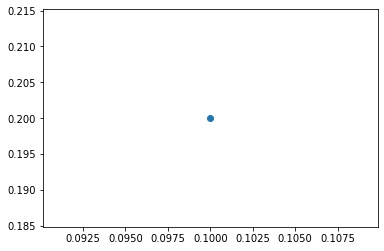

In [24]:
plt.scatter(new_data[:,0], new_data[:,2])